# ĐỒ ÁN PHÂN TÍCH DỮ LIỆU KINH DOANH

In [1]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import time
from datetime import timedelta
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [2]:
df = pd.read_csv('Term_Deposit.csv')
df

Id   age           job   marital  education default  balance  \
0       1001  29.0    management   married   tertiary      no   2143.0   
1       1002  44.0    technician    single  secondary      no     29.0   
2       1003  33.0  entrepreneur   married  secondary      no      2.0   
3       1004  47.0   blue-collar   married    unknown      no   1506.0   
4       1005  33.0       unknown    single    unknown      no      1.0   
...      ...   ...           ...       ...        ...     ...      ...   
45206  46207  51.0    technician   married   tertiary      no    825.0   
45207  46208  71.0       retired  divorced    primary      no   1729.0   
45208  46209  72.0       retired   married  secondary      no   5715.0   
45209  46210  57.0   blue-collar   married  secondary      no    668.0   
45210  46211  37.0  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no    unknown    5   may       261         1     -1         0   
1         yes   no    unknown    5   may       151         1     -1         0   
2         yes  yes    unknown    5   may        76         1     -1         0   
3         yes   no    unknown    5   may        92         1     -1         0   
4          no   no    unknown    5   may       198         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
45206      no   no   cellular   17   nov       977         3     -1         0   
45207      no   no   cellular   17   nov       456         2     -1         0   
45208      no   no   cellular   17   nov      1127         5    184         3   
45209      no   no  telephone   17   nov       508         4     -1         0   
45210      no   no   cellular   17   nov       361         2    188        11   

      poutcome    y  
0      unknown   no  
1      unknown   no  
2      unknown   no  
3      unknown   no  
4      unknown   no  
...        ...  ...  
45206  unknown  yes  
45207  unknown  yes  
45208  success  yes  
45209  unknown   no  
45210    other   no  

[45211 rows x 18 columns]

In [3]:
df.dtypes

Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

# Tiền Xử Lí Dữ Liệu
### 1. Tìm cột không cần thiết.
### 2. Tìm cột thiếu dữ liệu (missing values) .
### 3. Tìm những cột chỉ có 1 giá trị.
### 4. Tìm các thuộc tính phân loại (categories features).
### 5. Tìm khoảng giá trị thuộc tính phân loại .
### 6. Tìm các thuộc tính rời rạc (discreate feature) và liên tục (continous feature).
### 7. Xem Outlier trong các thuộc tính numeric.
### 8. Xem mối tương quan giữa các thuộc tính.
### 9. Kiểm tra Dataset có cân bằng hay không dựa trên các giá trị label.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


## 1. Tìm cột không cần thiết
Cột ID là mã của cuộc giao dịch, không mang ý nghĩa trong tập dữ liệu nên chúng ta sẽ xóa cột ID.

In [5]:
#Xóa cột không cần thiết: ID
del df['Id']

## 2. Tìm cột có dữ liệu bị thiếu
Thiếu dữ liệu là một sự xuất hiện phổ biến và có thể có ảnh hưởng đáng kể đến các kết luận có thể được rút ra từ dữ liệu. Để kết luật được chính xác hơn thì loại bỏ các dòng dữ liệu thiếu là rất cần thiết.

In [6]:
#Tìm missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

age 0.0002  % missing values
balance 0.0001  % missing values
No missing value found


In [7]:
df.isnull().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 3. Tìm cột có 1 giá trị

In [8]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


## => Không có cột nào có 1 giá trị.


## Tiến hành lọc bỏ những dòng giá trị thiếu và những dòng có giá trị "unknown":

In [9]:
df_filtered= df.replace('NaN', np.nan)
df_filtered= df.replace('unknown', np.nan)
df_filtered.dropna(inplace=True)
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.head(18)

age           job   marital  education default  balance housing loan  \
0   33.0        admin.   married   tertiary      no    882.0      no   no   
1   42.0        admin.    single  secondary      no   -247.0     yes  yes   
2   33.0      services   married  secondary      no   3444.0     yes   no   
3   36.0    management   married   tertiary      no   2415.0     yes   no   
4   36.0    management   married   tertiary      no      0.0     yes   no   
5   44.0   blue-collar   married  secondary      no   1324.0     yes   no   
6   26.0    technician    single   tertiary      no    172.0      no  yes   
7   51.0        admin.    single  secondary      no   3132.0      no   no   
8   33.0    unemployed  divorced  secondary      no   1005.0     yes   no   
9   30.0        admin.   married  secondary      no    873.0     yes   no   
10  30.0    management    single   tertiary      no   1243.0     yes   no   
11  44.0  entrepreneur   married   tertiary      no   1631.0     yes   no   
12  51.0    management  divorced   tertiary      no    119.0      no   no   
13  51.0    technician   married  secondary      no     58.0     yes   no   
14  44.0    management   married   tertiary      no   6203.0     yes  yes   
15  34.0    technician    single  secondary      no    105.0     yes   no   
16  49.0    management   married   tertiary      no   1533.0      no   no   
17  47.0     housemaid   married   tertiary      no    228.0     yes   no   

      contact  day month  duration  campaign  pdays  previous poutcome    y  
0   telephone   21   oct        39         1    151         3  failure   no  
1   telephone   21   oct       519         1    166         1    other  yes  
2   telephone   21   oct       144         1     91         4  failure  yes  
3   telephone   22   oct        73         1     86         4    other   no  
4   telephone   23   oct       140         1    143         3  failure  yes  
5   telephone   25   oct       119         1     89         2    other   no  
6   telephone    4   nov        21         1    140         4    other   no  
7   telephone    5   nov       449         1    176         1  failure   no  
8   telephone   10   nov       175         1    174         2  failure   no  
9   telephone   12   nov       119         1    167         3  success   no  
10  telephone   13   nov        86         1    174         1  failure   no  
11   cellular   17   nov        81         1    195         2  failure   no  
12   cellular   17   nov       200         1    165         2  failure   no  
13   cellular   17   nov        79         1    129         2  failure   no  
14   cellular   17   nov        58         1    188         1  failure   no  
15   cellular   17   nov       303         1    196         2  failure   no  
16   cellular   17   nov       324         1    172         1  failure   no  
17   cellular   17   nov        80         1    118         1  failure   no

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        7842 non-null   float64
 1   job        7842 non-null   object 
 2   marital    7842 non-null   object 
 3   education  7842 non-null   object 
 4   default    7842 non-null   object 
 5   balance    7842 non-null   float64
 6   housing    7842 non-null   object 
 7   loan       7842 non-null   object 
 8   contact    7842 non-null   object 
 9   day        7842 non-null   int64  
 10  month      7842 non-null   object 
 11  duration   7842 non-null   int64  
 12  campaign   7842 non-null   int64  
 13  pdays      7842 non-null   int64  
 14  previous   7842 non-null   int64  
 15  poutcome   7842 non-null   object 
 16  y          7842 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 1.0+ MB


In [11]:
df_filtered.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 4. Tìm các thuộc tính phân loại
Đổi kiểu dữ liệu của các thuộc tính phân loại sang dạng số để áp dụng các thuật toán.

In [12]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
##Tiến hành đổi dữ liệu chữ thành số

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
df_filtered['job'] = encoder.fit_transform(df_filtered['job'])
job = {index : label for index, label in enumerate(encoder.classes_)}
job

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed'}

In [16]:
df_filtered['marital'] = encoder.fit_transform(df_filtered['marital'])
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

{0: 'divorced', 1: 'married', 2: 'single'}

In [17]:
df_filtered['education'] = encoder.fit_transform(df_filtered['education'])
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'primary', 1: 'secondary', 2: 'tertiary'}

In [18]:
df_filtered['default'] = encoder.fit_transform(df_filtered['default'])
default = {index : label for index, label in enumerate(encoder.classes_)}
default

{0: 'no', 1: 'yes'}

In [19]:
df_filtered['loan'] = encoder.fit_transform(df_filtered['loan'])
loan = {index : label for index, label in enumerate(encoder.classes_)}
loan

{0: 'no', 1: 'yes'}

In [20]:
df_filtered['contact'] = encoder.fit_transform(df_filtered['contact'])
contact = {index : label for index, label in enumerate(encoder.classes_)}
contact

{0: 'cellular', 1: 'telephone'}

In [21]:
df_filtered['month'] = encoder.fit_transform(df_filtered['month'])
month = {index : label for index, label in enumerate(encoder.classes_)}
month

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

In [22]:
df_filtered['poutcome'] = encoder.fit_transform(df_filtered['poutcome'])
poutcome = {index : label for index, label in enumerate(encoder.classes_)}
poutcome

{0: 'failure', 1: 'other', 2: 'success'}

In [23]:
df_filtered['housing'] = encoder.fit_transform(df_filtered['housing'])
housing = {index : label for index, label in enumerate(encoder.classes_)}
housing

{0: 'no', 1: 'yes'}

In [24]:
#đổi số âm trong cột pdays
df_filtered['pdays']= df_filtered['pdays'].replace([-1], 0)
print(df_filtered['pdays'])

0       151
1       166
2        91
3        86
4       143
       ... 
7837    530
7838    184
7839     40
7840    184
7841    188
Name: pdays, Length: 7842, dtype: int64


In [25]:
df_filtered['y'] = encoder.fit_transform(df_filtered['y'])
y = {index : label for index, label in enumerate(encoder.classes_)}
y

{0: 'no', 1: 'yes'}

## 5. Tìm khoảng giá trị thuộc tính phân loại 


In [26]:
for feature in categorical_features:
    print('Thuộc tính {} có số giá trị là: {}'.format(feature,len(df[feature].unique())))

Thuộc tính job có số giá trị là: 12
Thuộc tính marital có số giá trị là: 3
Thuộc tính education có số giá trị là: 4
Thuộc tính default có số giá trị là: 2
Thuộc tính housing có số giá trị là: 2
Thuộc tính loan có số giá trị là: 2
Thuộc tính contact có số giá trị là: 3
Thuộc tính month có số giá trị là: 12
Thuộc tính poutcome có số giá trị là: 4


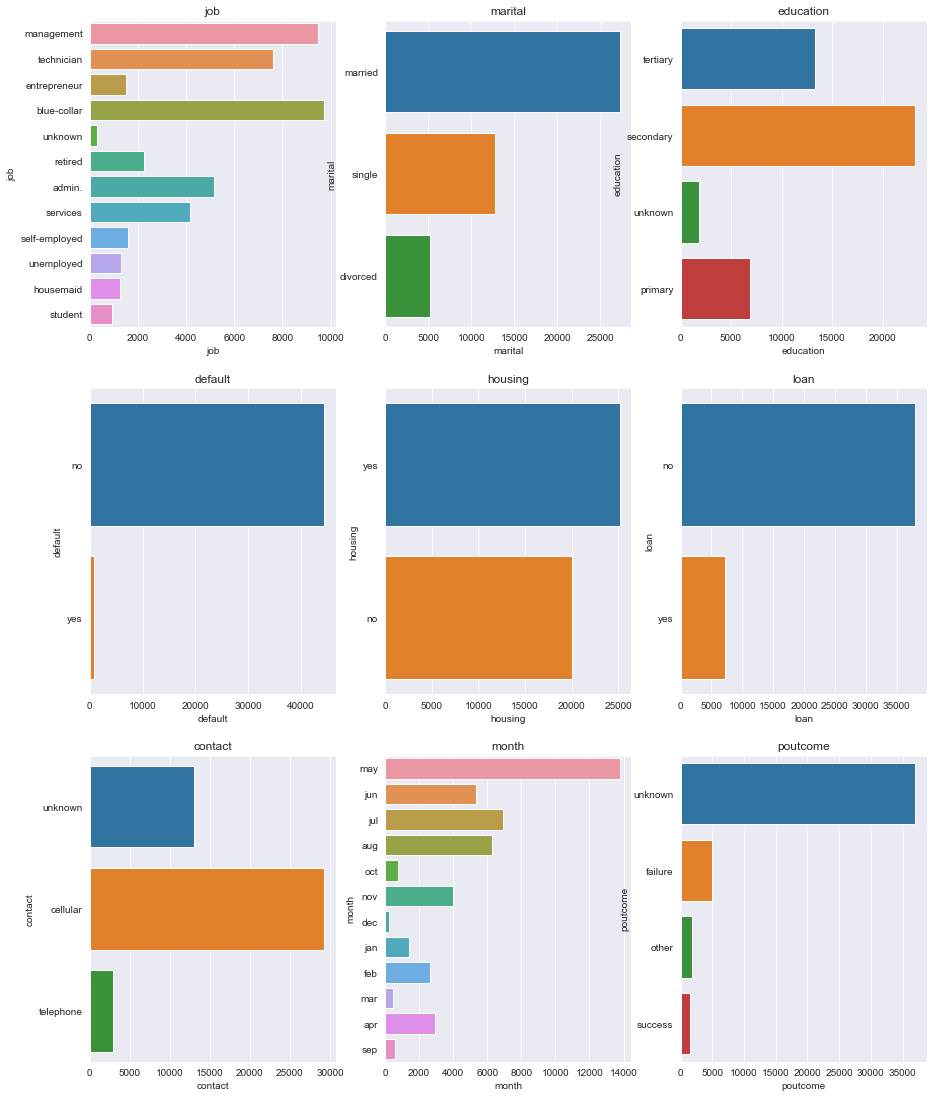

In [27]:
#kiểm tra phân bố số lượng giá trị các thuộc tính phân loại:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

## => Có tất cả 9 thuộc tính phân loại
Thuộc tính Month và Job có nhiều giá trị nhất.
Thuộc tính Default có chênh lệch giá trị nhiều nhất, có thể loại bỏ.

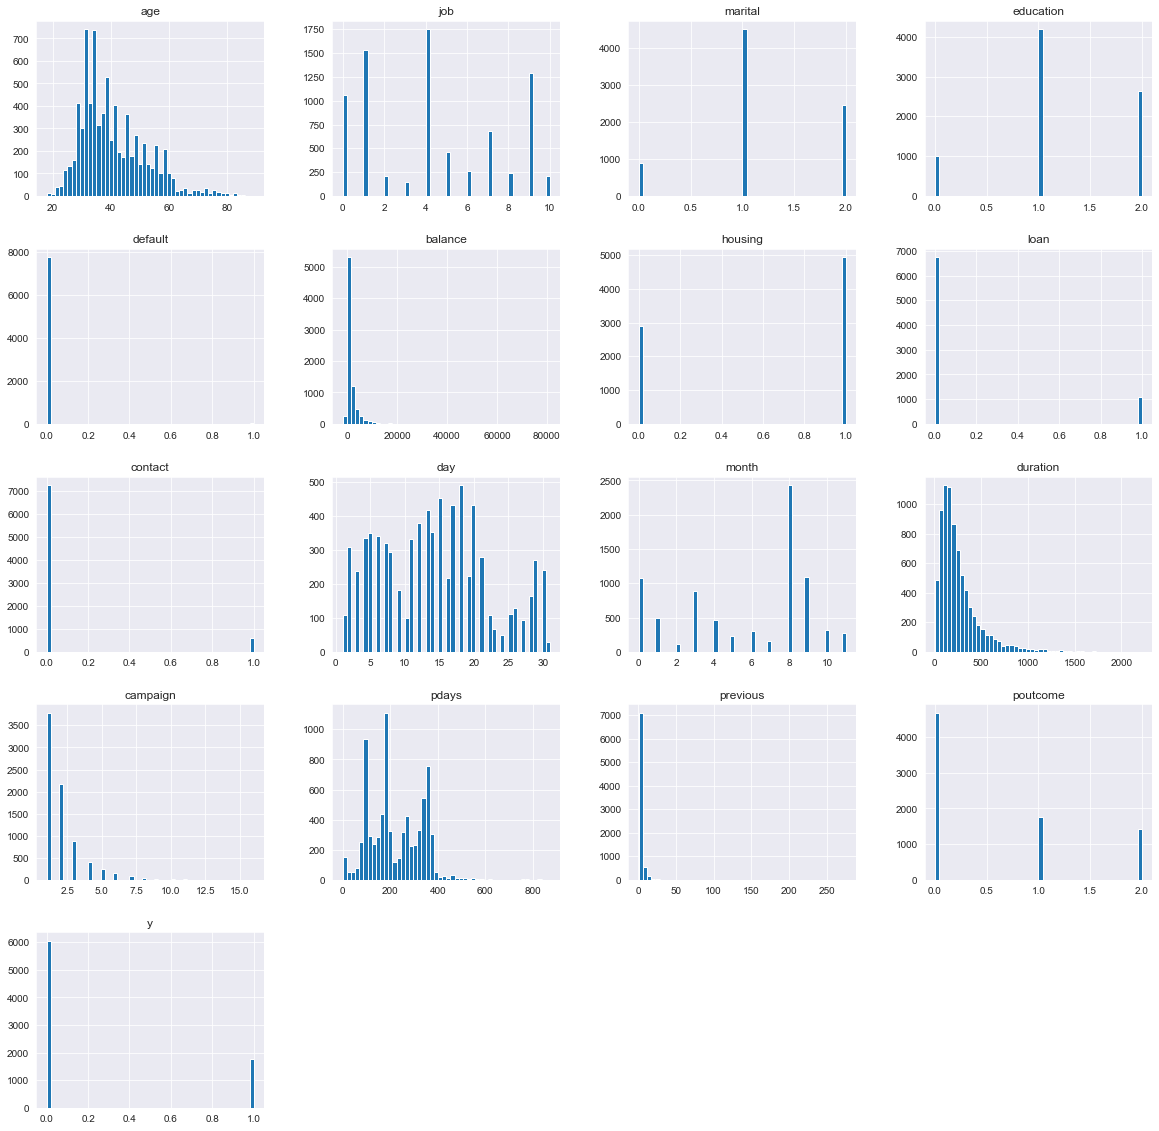

In [28]:
df_filtered.hist(bins=50,figsize=(20, 20))
plt.show()


In [29]:
df_filtered.drop(['default'],axis=1, inplace=True)

In [30]:
df_filtered.head(18)

age  job  marital  education  balance  housing  loan  contact  day  \
0   33.0    0        1          2    882.0        0     0        1   21   
1   42.0    0        2          1   -247.0        1     1        1   21   
2   33.0    7        1          1   3444.0        1     0        1   21   
3   36.0    4        1          2   2415.0        1     0        1   22   
4   36.0    4        1          2      0.0        1     0        1   23   
5   44.0    1        1          1   1324.0        1     0        1   25   
6   26.0    9        2          2    172.0        0     1        1    4   
7   51.0    0        2          1   3132.0        0     0        1    5   
8   33.0   10        0          1   1005.0        1     0        1   10   
9   30.0    0        1          1    873.0        1     0        1   12   
10  30.0    4        2          2   1243.0        1     0        1   13   
11  44.0    2        1          2   1631.0        1     0        0   17   
12  51.0    4        0          2    119.0        0     0        0   17   
13  51.0    9        1          1     58.0        1     0        0   17   
14  44.0    4        1          2   6203.0        1     1        0   17   
15  34.0    9        2          1    105.0        1     0        0   17   
16  49.0    4        1          2   1533.0        0     0        0   17   
17  47.0    3        1          2    228.0        1     0        0   17   

    month  duration  campaign  pdays  previous  poutcome  y  
0      10        39         1    151         3         0  0  
1      10       519         1    166         1         1  1  
2      10       144         1     91         4         0  1  
3      10        73         1     86         4         1  0  
4      10       140         1    143         3         0  1  
5      10       119         1     89         2         1  0  
6       9        21         1    140         4         1  0  
7       9       449         1    176         1         0  0  
8       9       175         1    174         2         0  0  
9       9       119         1    167         3         2  0  
10      9        86         1    174         1         0  0  
11      9        81         1    195         2         0  0  
12      9       200         1    165         2         0  0  
13      9        79         1    129         2         0  0  
14      9        58         1    188         1         0  0  
15      9       303         1    196         2         0  0  
16      9       324         1    172         1         0  0  
17      9        80         1    118         1         0  0

## 7. Tìm các thuộc tính rời rạc (discreate feature) và liên tục (continous feature)



In [31]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Số lượng các thuộc tính numeric là: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Số lượng các thuộc tính numeric là:  7


age  balance  day  duration  campaign  pdays  previous
0  29.0   2143.0    5       261         1     -1         0
1  44.0     29.0    5       151         1     -1         0
2  33.0      2.0    5        76         1     -1         0
3  47.0   1506.0    5        92         1     -1         0
4  33.0      1.0    5       198         1     -1         0

In [32]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Số lượng thuộc tính Discrete: {}".format(len(discrete_feature)))

Số lượng thuộc tính Discrete: 0


In [33]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Số lượng thuộc tính Continuous: {}".format(len(continuous_features)))

Số lượng thuộc tính Continuous: 7


In [34]:
numeric = df_filtered.select_dtypes(exclude='object')

In [35]:
cols_to_check = [col for col in numeric.columns if col not in ['y']]
cols_to_check

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

C:\Users\kakac\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\kakac\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\kakac\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

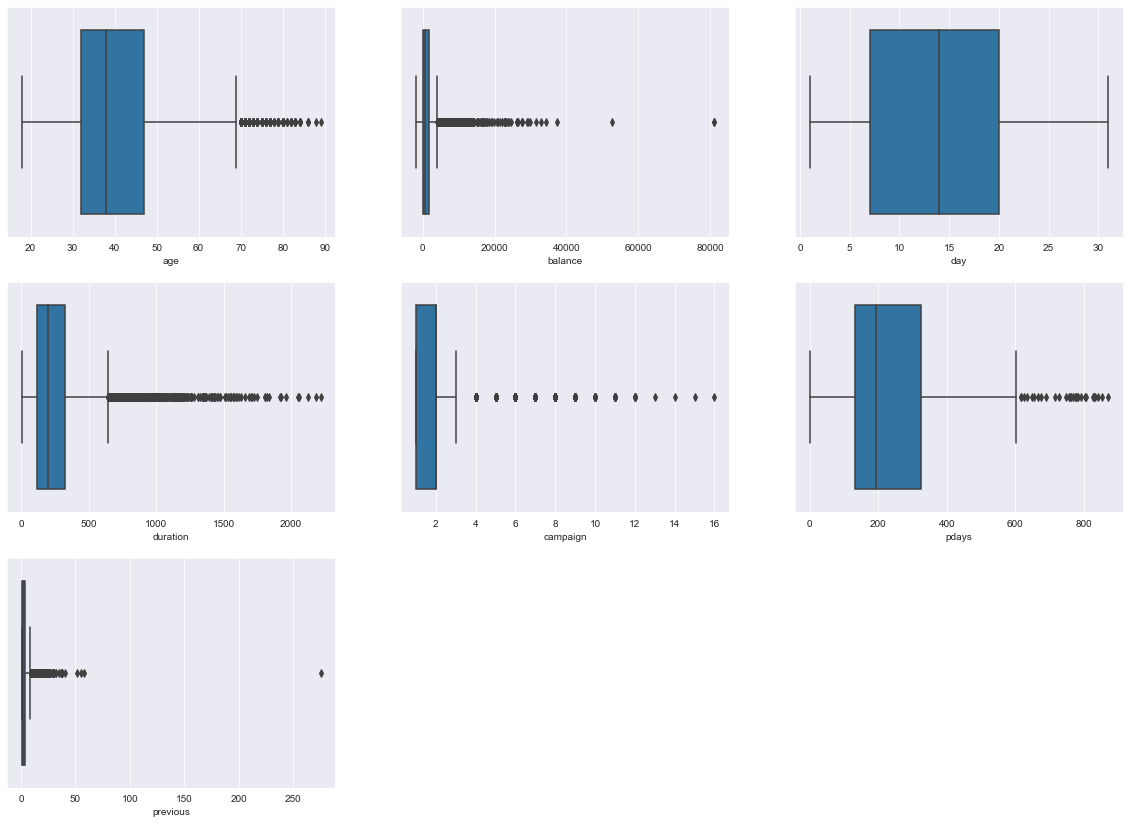

In [36]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_filtered[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

## age, balance, duration, compaign, pdays và previous có một số ngoại lệ


## Kiểm tra độ tương quan:


<AxesSubplot:>

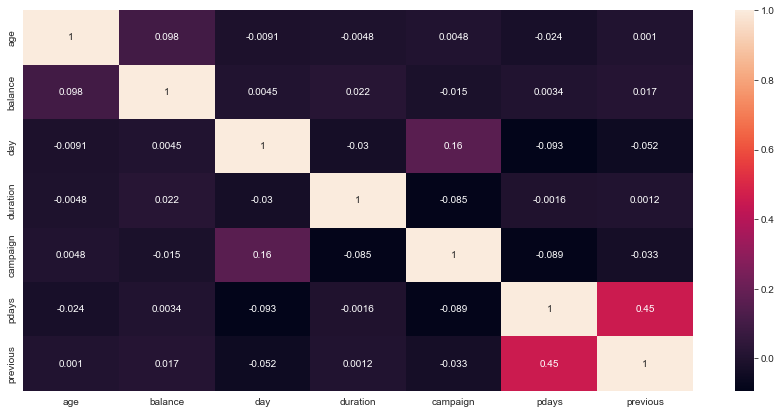

In [37]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

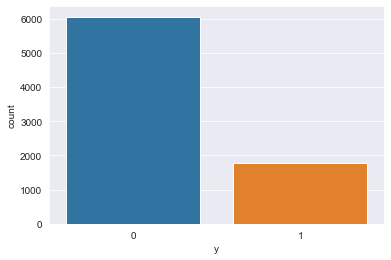

In [38]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df_filtered)
plt.show()

In [39]:
df_filtered['y'].groupby(df_filtered['y']).count()

y
0    6056
1    1786
Name: y, dtype: int64

# DỮ LIỆU SAU KHI TIỀN XỬ LÍ
1. Từ 45211 dòng và 18 cột thuộc tính còn 7842 dòng và 16 cột thuộc tính.
2. Đổi các dữ liệu dạng chữ thành dạng số.
3. Sự mất cân bằng trọng số label đã được cải thiện.

## Nhận xét
1. Thuộc tính phân loại(Category features): "job", "marital", "education","housing","loan","contact","month","poutcome".
2. Thuộc tính liên tục(Continous features): "age", "balance", "day", "duration","pdays","campaign", "previous"
3. Label: "y"
4. Thuộc tính bị loại bỏ: "id", "default"

In [40]:
numerical_data = df_filtered.select_dtypes(include="number")
numerical_data

age  job  marital  education  balance  housing  loan  contact  day  \
0     33.0    0        1          2    882.0        0     0        1   21   
1     42.0    0        2          1   -247.0        1     1        1   21   
2     33.0    7        1          1   3444.0        1     0        1   21   
3     36.0    4        1          2   2415.0        1     0        1   22   
4     36.0    4        1          2      0.0        1     0        1   23   
...    ...  ...      ...        ...      ...      ...   ...      ...  ...   
7837  34.0    1        2          1   1475.0        1     0        0   16   
7838  53.0    4        1          2    583.0        0     0        0   17   
7839  30.0    5        1          1   2850.0        0     0        0   17   
7840  72.0    5        1          1   5715.0        0     0        0   17   
7841  37.0    2        1          1   2971.0        0     0        0   17   

      month  duration  campaign  pdays  previous  poutcome  y  
0        10        39         1    151         3         0  0  
1        10       519         1    166         1         1  1  
2        10       144         1     91         4         0  1  
3        10        73         1     86         4         1  0  
4        10       140         1    143         3         0  1  
...     ...       ...       ...    ...       ...       ... ..  
7837      9      1166         3    530        12         1  0  
7838      9       226         1    184         4         2  1  
7839      9       300         1     40         8         0  1  
7840      9      1127         5    184         3         2  1  
7841      9       361         2    188        11         1  0  

[7842 rows x 16 columns]

In [41]:
df_filtered.to_csv('Term_Deposit_Final.csv')

# Feature Engineering

# Chi-square test
Đặt giả thuyết:

Null hypothesis (H0) : output feature không phụ thuộc input feature
Alternate hypothesis (H1): output feature có phụ thuộc input feature
Nếu ta chấp nhận giả thuyết H0, tức label không phụ thuộc vào input feature đang xét và ngược lại

Mức alpha xét = 0.05

Mục tiêu: lấy ra được những feature có tác động tới output

In [42]:
from sklearn.feature_selection import SelectKBest, chi2

In [43]:
#chi square test
categorical_features = df_filtered[["job", "marital", "education","housing","loan","contact","month","poutcome"]]

In [44]:
best_features = SelectKBest(chi2, k=8)
best_features.fit(categorical_features, df_filtered["y"])

SelectKBest(k=8, score_func=<function chi2 at 0x000001D0DDA9EA70>)

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["job", "marital", "education","housing","loan","contact","month","poutcome"]
df_score.sort_values(by='p_values')

p_values  chi2_values    columns
7  0.000000e+00  1432.740035   poutcome
3  6.612718e-66   294.021263    housing
0  2.494899e-27   117.278262        job
4  3.536994e-22    93.773933       loan
2  8.617165e-09    33.130605  education
1  9.764575e-03     6.677349    marital
5  3.130751e-01     1.017658    contact
6  5.032254e-01     0.448128      month

In [46]:
#chọn ra những giá trị <= 0.05, <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0          job
1      marital
2    education
3      housing
4         loan
7     poutcome
Name: columns, dtype: object

# Anova F-test
Đặt giả thuyết:

Null hypothesis (H0) : 2 groups có cùng phương sai
Alternate hypothesis (H1): 2 groups có phương sai khác nhau
Nếu ta chấp nhận giả thuyết H0, tức input feature hiện tại không ảnh hưởng tới label và ngược lại

Mức alpha xét = 0.05

Mục tiêu: lấy ra được những feature có tác động tới output

In [47]:
#anova
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
continous_features = df_filtered[["age", "balance", "day", "duration","pdays","campaign", "previous"]]

In [49]:
best_features = SelectKBest(f_classif, k=7)
best_features.fit(continous_features , df_filtered["y"])

SelectKBest(k=7)

In [50]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["age", "balance", "day", "duration","pdays","campaign", "previous"]
df_score.sort_values(by='p_values')

p_values  anova_values   columns
3  7.548630e-220   1068.615040  duration
4   2.020592e-41    183.874863     pdays
5   2.372380e-17     72.142062  campaign
1   2.259002e-12     49.403215   balance
0   4.438652e-09     34.499064       age
2   8.929715e-03      6.840249       day
6   2.728743e-01      1.202409  previous

In [51]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0         age
1     balance
2         day
3    duration
4       pdays
5    campaign
Name: columns, dtype: object

# Chọn input và output:
1. Input: "job", "marital", "education","housing","loan","poutcome", "age", "balance", "day", "duration","pdays","campaign", "previous"
2. Output: y 

In [52]:
df_input = df_filtered[["job", "marital", "education","housing","loan","poutcome", "age", "balance", "day", "duration","pdays","campaign", "previous"]]

In [53]:
df_input.shape

(7842, 13)

In [54]:
label = df_filtered["y"]

In [55]:
df_filtered.drop(columns=["y"], inplace=True)

In [56]:
label.shape

(7842,)

In [57]:
df_input.head(18)

job  marital  education  housing  loan  poutcome   age  balance  day  \
0     0        1          2        0     0         0  33.0    882.0   21   
1     0        2          1        1     1         1  42.0   -247.0   21   
2     7        1          1        1     0         0  33.0   3444.0   21   
3     4        1          2        1     0         1  36.0   2415.0   22   
4     4        1          2        1     0         0  36.0      0.0   23   
5     1        1          1        1     0         1  44.0   1324.0   25   
6     9        2          2        0     1         1  26.0    172.0    4   
7     0        2          1        0     0         0  51.0   3132.0    5   
8    10        0          1        1     0         0  33.0   1005.0   10   
9     0        1          1        1     0         2  30.0    873.0   12   
10    4        2          2        1     0         0  30.0   1243.0   13   
11    2        1          2        1     0         0  44.0   1631.0   17   
12    4        0          2        0     0         0  51.0    119.0   17   
13    9        1          1        1     0         0  51.0     58.0   17   
14    4        1          2        1     1         0  44.0   6203.0   17   
15    9        2          1        1     0         0  34.0    105.0   17   
16    4        1          2        0     0         0  49.0   1533.0   17   
17    3        1          2        1     0         0  47.0    228.0   17   

    duration  pdays  campaign  previous  
0         39    151         1         3  
1        519    166         1         1  
2        144     91         1         4  
3         73     86         1         4  
4        140    143         1         3  
5        119     89         1         2  
6         21    140         1         4  
7        449    176         1         1  
8        175    174         1         2  
9        119    167         1         3  
10        86    174         1         1  
11        81    195         1         2  
12       200    165         1         2  
13        79    129         1         2  
14        58    188         1         1  
15       303    196         1         2  
16       324    172         1         1  
17        80    118         1         1

In [58]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        7842 non-null   int32  
 1   marital    7842 non-null   int32  
 2   education  7842 non-null   int32  
 3   housing    7842 non-null   int32  
 4   loan       7842 non-null   int32  
 5   poutcome   7842 non-null   int32  
 6   age        7842 non-null   float64
 7   balance    7842 non-null   float64
 8   day        7842 non-null   int64  
 9   duration   7842 non-null   int64  
 10  pdays      7842 non-null   int64  
 11  campaign   7842 non-null   int64  
 12  previous   7842 non-null   int64  
dtypes: float64(2), int32(6), int64(5)
memory usage: 612.8 KB


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(df_input,label,test_size=0.3,random_state=42)

In [61]:
x_train.shape


(5489, 13)

In [62]:
y_train.shape


(5489,)

In [63]:
x_test.shape


(2353, 13)

In [64]:
y_test.shape

(2353,)

In [65]:
#Decision Tree (CART)
from sklearn import tree
import time
from datetime import timedelta
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
start_cart = time.time()
cart_pred = clf1.fit(x_train, y_train).predict(x_test)
end_cart = time.time()
times_cart = timedelta(seconds=round(end_cart - start_cart,4)).total_seconds()
print("Time decision tree (CART)",times_cart)

Time decision tree (CART) 0.0472


In [66]:
import sklearn.metrics as metrics
cart_score = metrics.accuracy_score(y_test, cart_pred)
accuracies_cart= cart_score
print("Accuracy",cart_score)
print("Report",metrics.classification_report(y_test,cart_pred))

Accuracy 0.7994050148746281
Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1811
           1       0.57      0.54      0.55       542

    accuracy                           0.80      2353
   macro avg       0.72      0.71      0.71      2353
weighted avg       0.80      0.80      0.80      2353



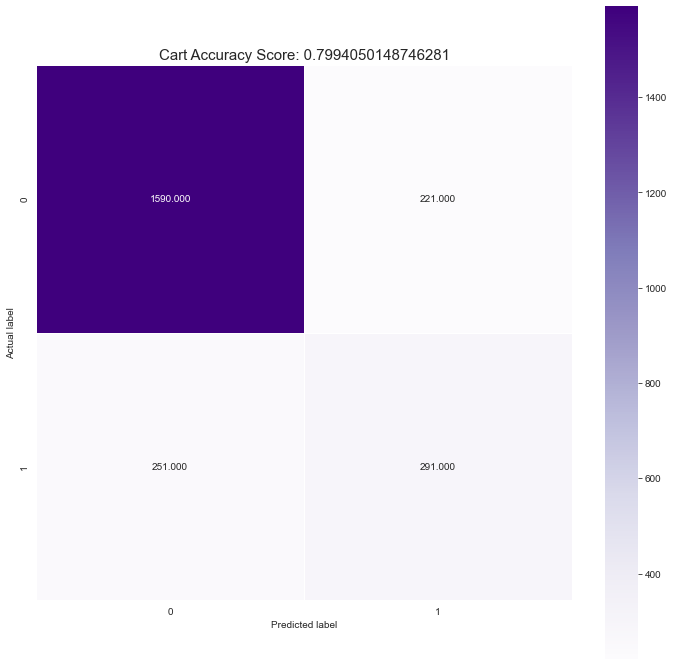

In [67]:
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax= sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Purples')
ax.set_ylabel ('Actual label')
ax.set_xlabel('Predicted label')
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

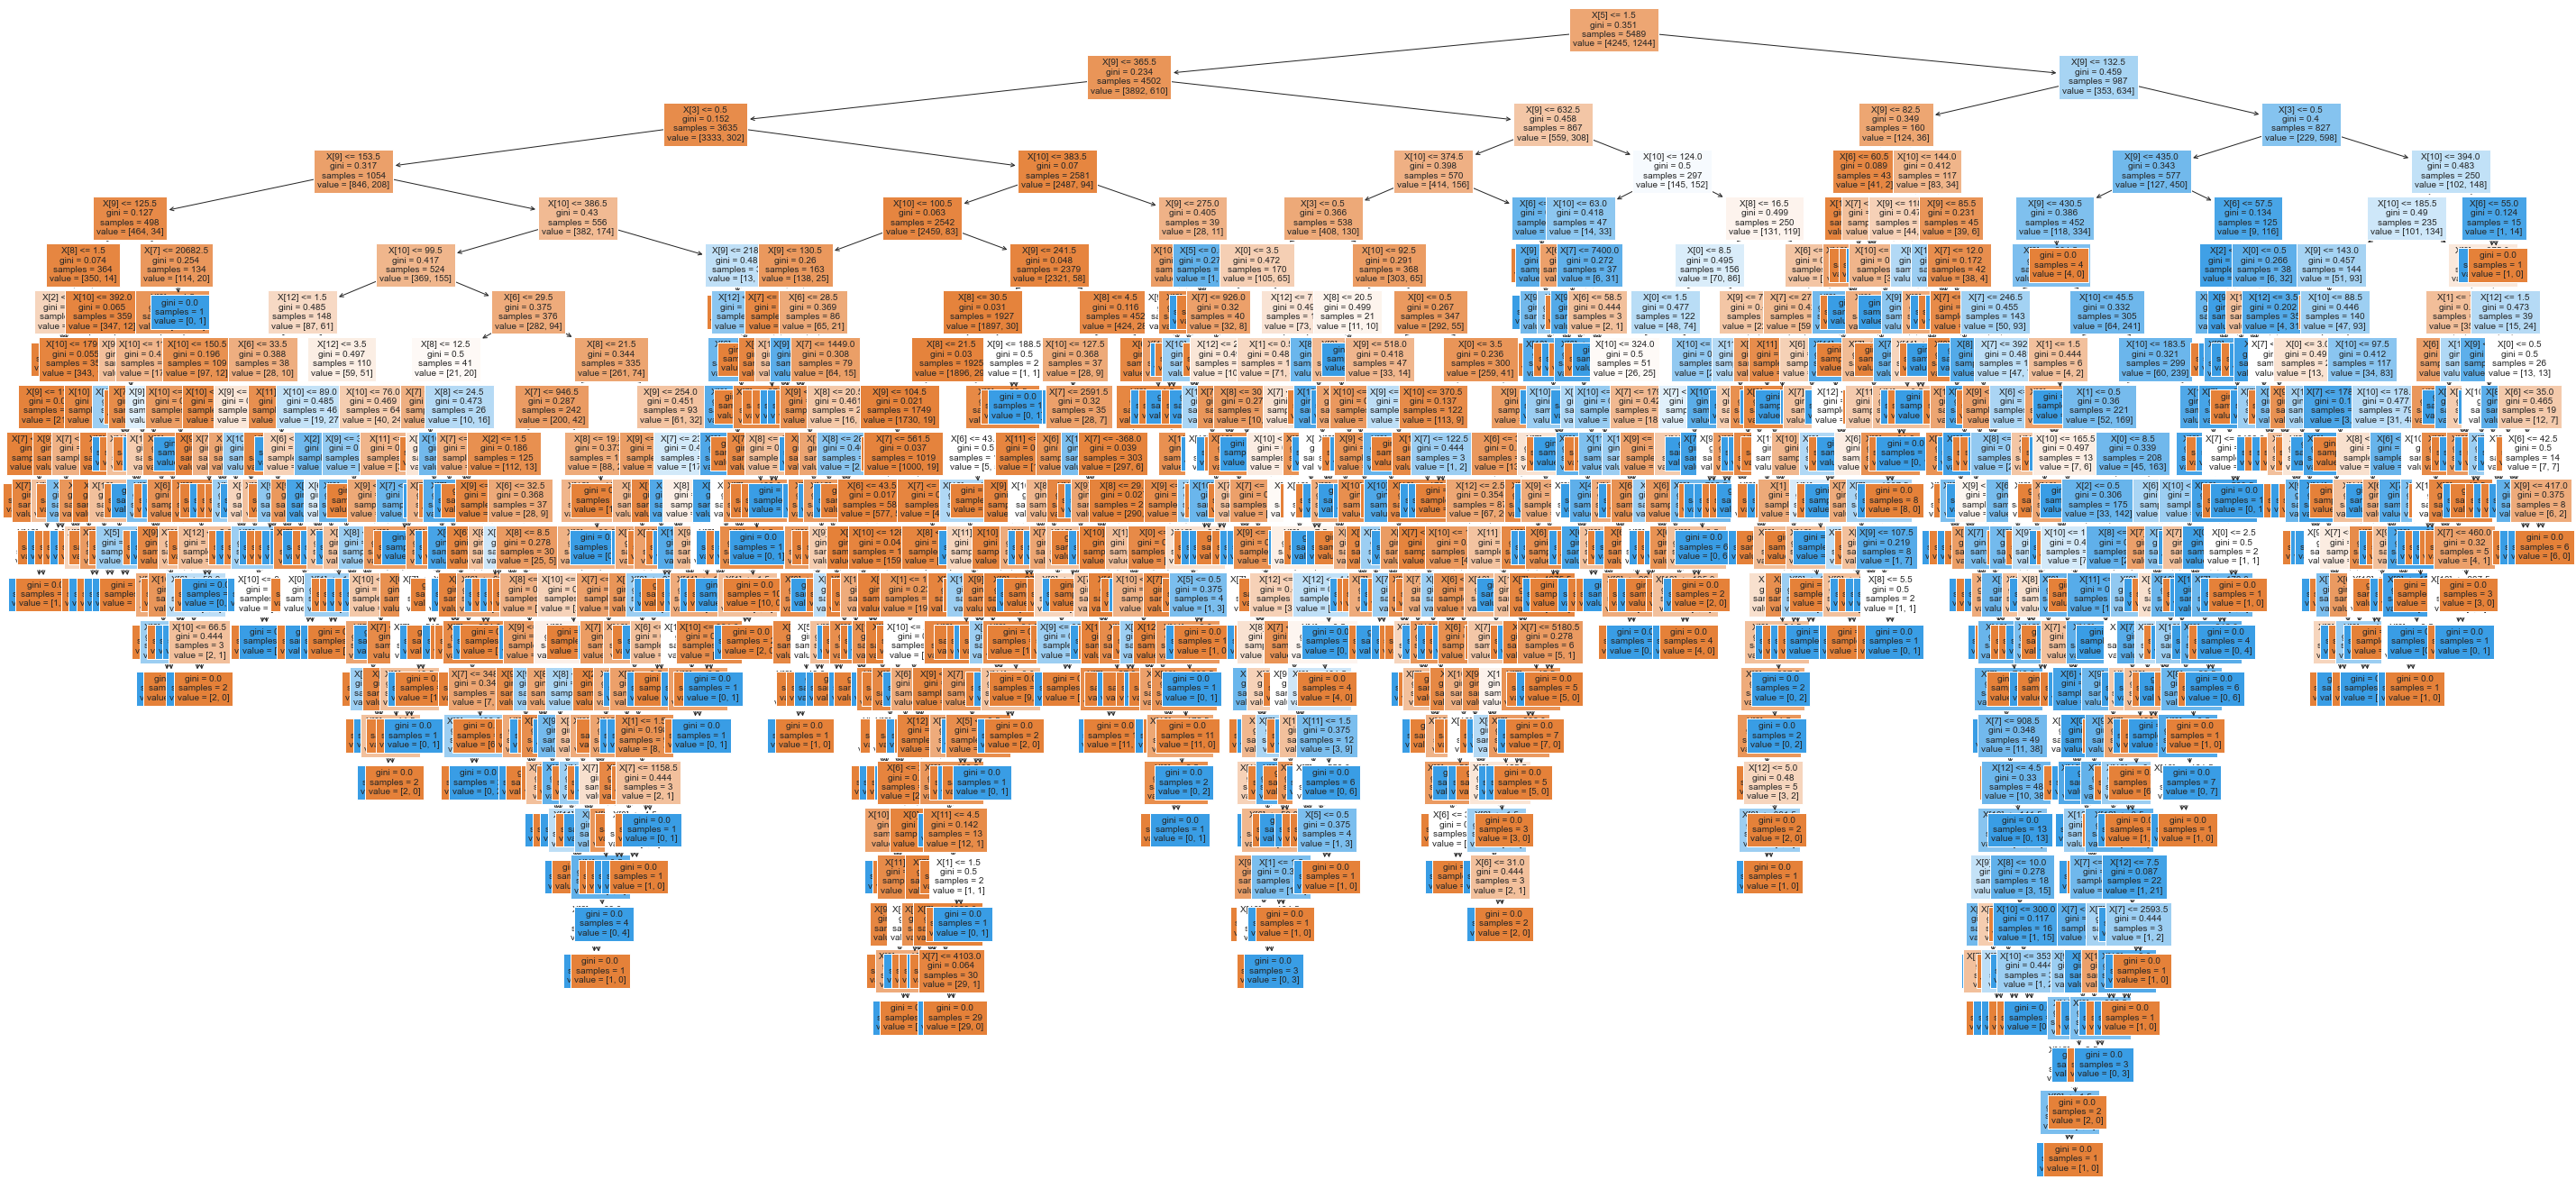

In [68]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

In [69]:
#Tan, Decision Tree (ID3)
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(x_train, y_train).predict(x_test)
end_tree = time.time()
times_id3 = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",times_id3)

Time decision tree (ID3) 0.0462


In [70]:
#Tan, Decision Tree (ID3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
accuracies_id3=id3_score
print("Accuracy",accuracies_id3)
print("Report",metrics.classification_report(y_test,id3_pred))

Accuracy 0.8121546961325967
Report               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1811
           1       0.59      0.60      0.60       542

    accuracy                           0.81      2353
   macro avg       0.74      0.74      0.74      2353
weighted avg       0.81      0.81      0.81      2353



Text(0.5, 1.0, 'ID3 Accuracy Score: 0.8121546961325967')

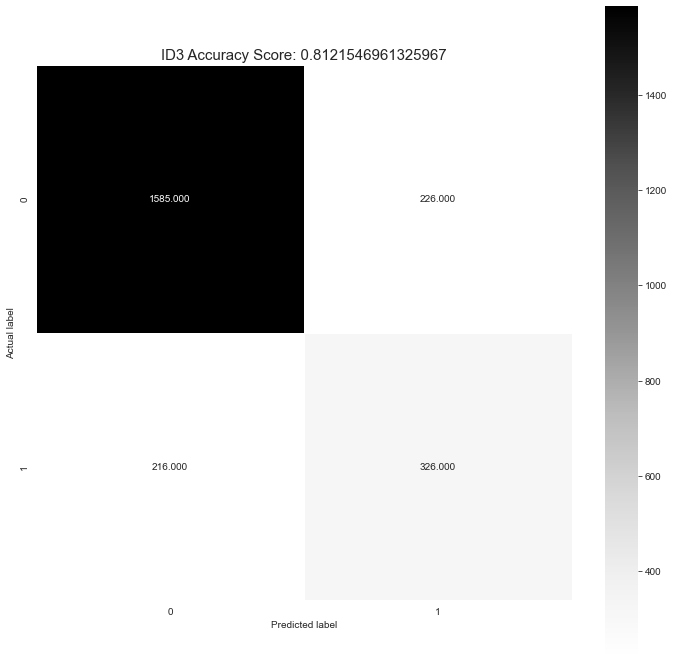

In [71]:
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Greys')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)

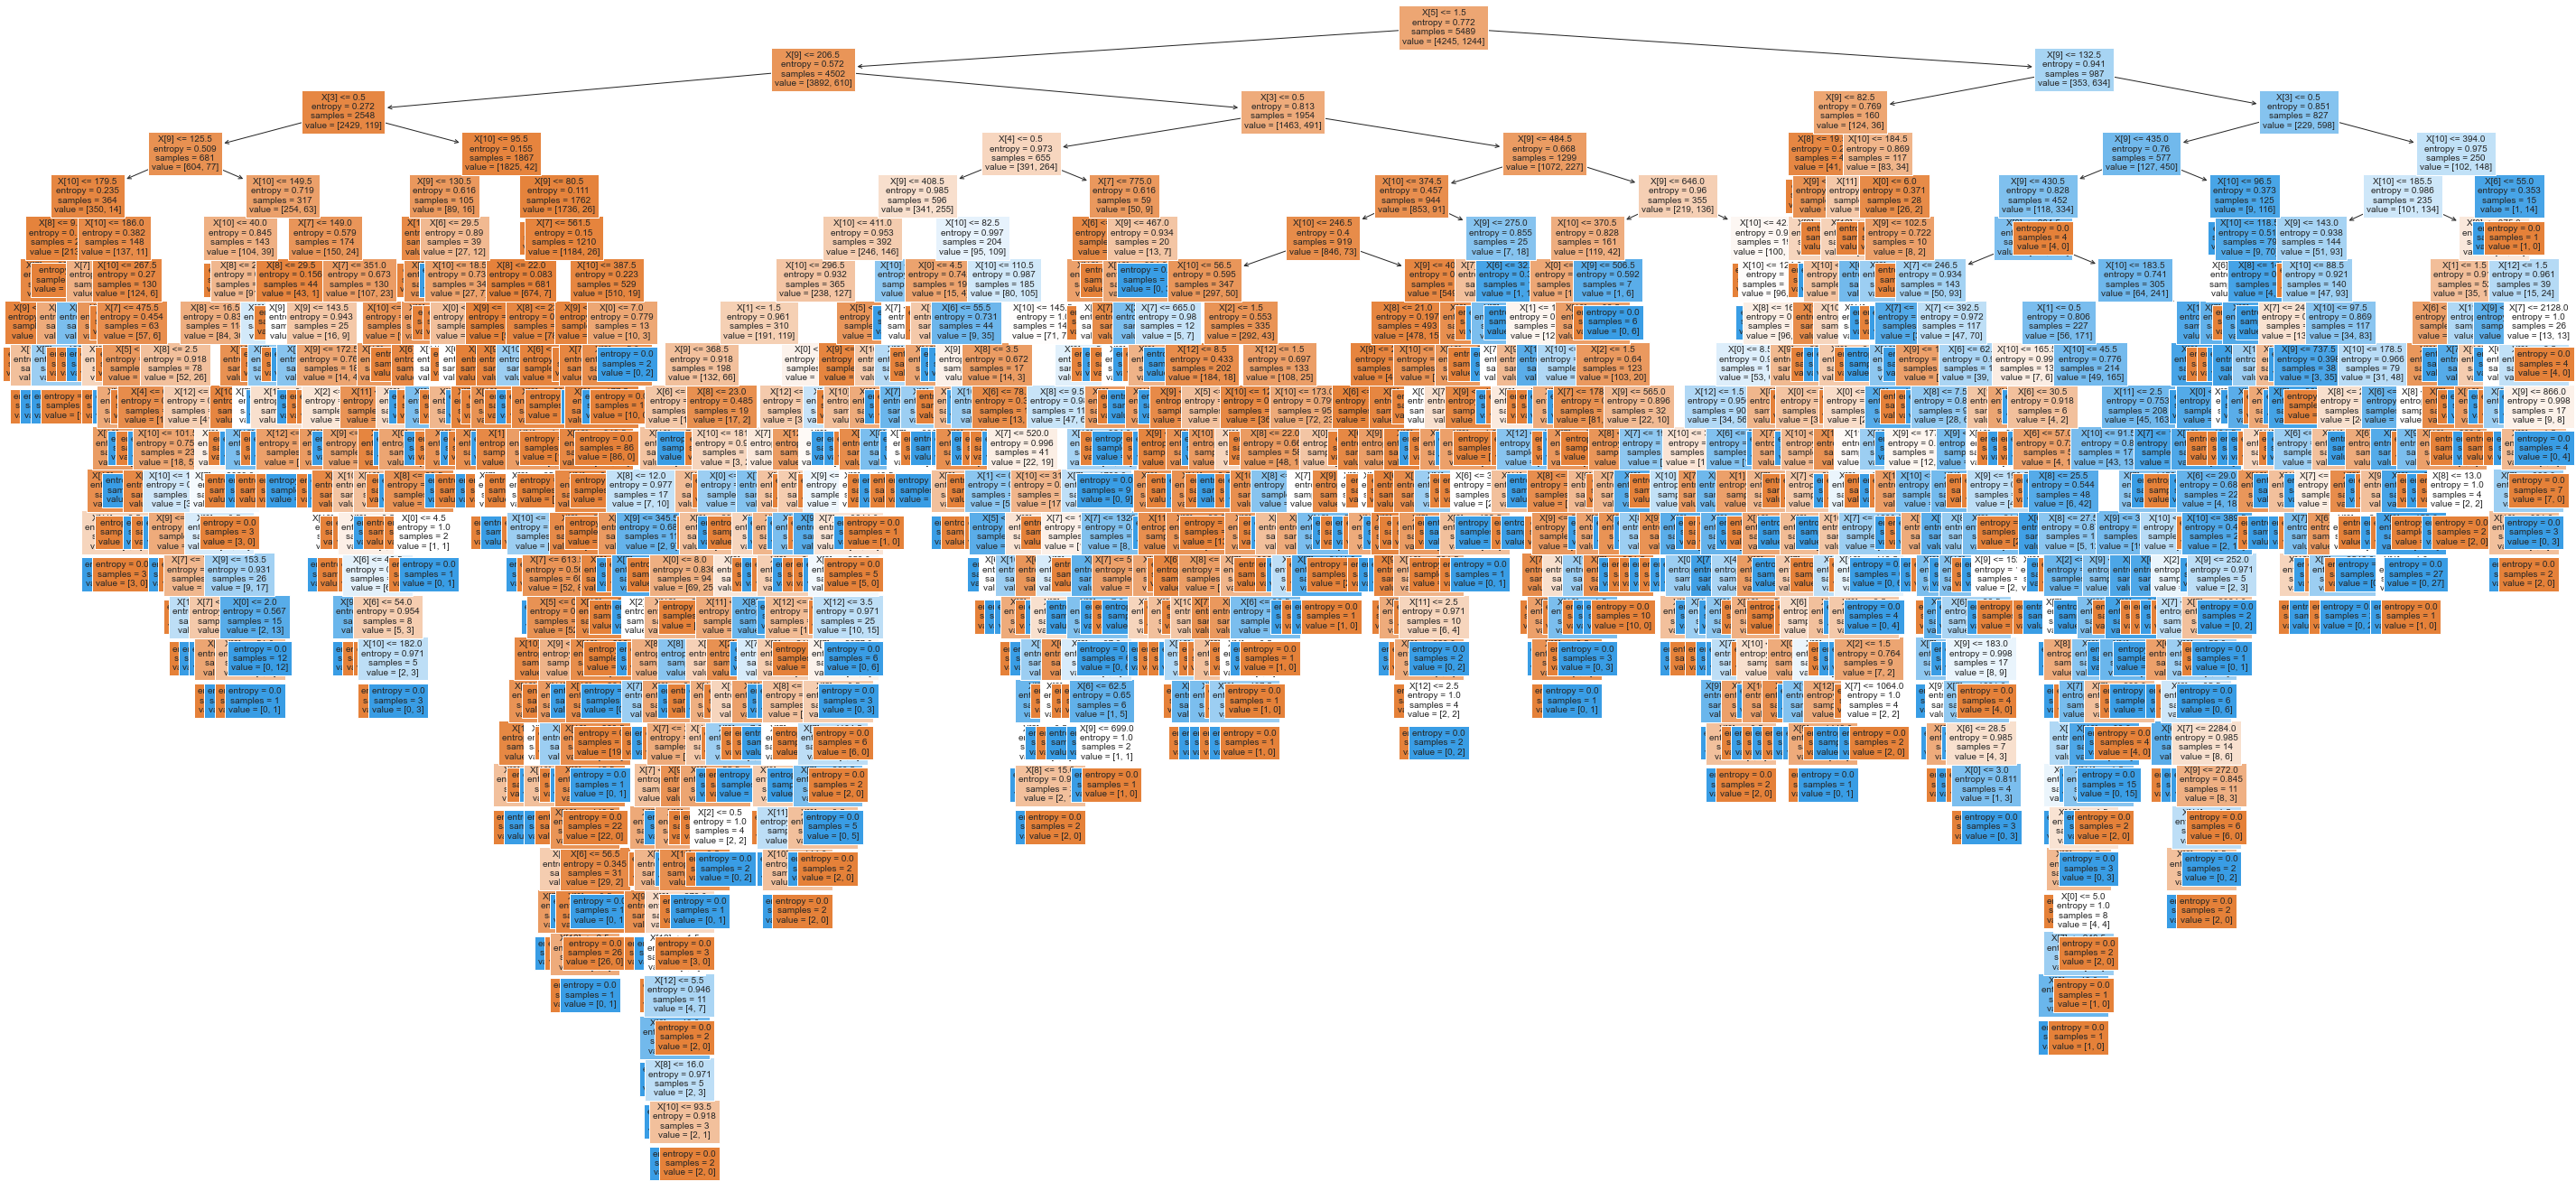

In [72]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [73]:
#KNearest
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,12):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(x_train, y_train).predict(x_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
times_knn = timedelta(seconds=round(end_knn - start_knn,4)).total_seconds()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', times_knn)
knn_score = max_knn_score
accuracies_max_knn = knn_score
print("Accuracy", accuracies_max_knn)
print("Report", metrics.classification_report(y_test, knn_pred))

Highest Accuracy Score : 78.36804079898002% with k = [8]
Time 0.8732
Accuracy 0.7836804079898002
Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1811
           1       0.54      0.33      0.41       542

    accuracy                           0.78      2353
   macro avg       0.68      0.62      0.64      2353
weighted avg       0.75      0.78      0.76      2353



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.7836804079898002')

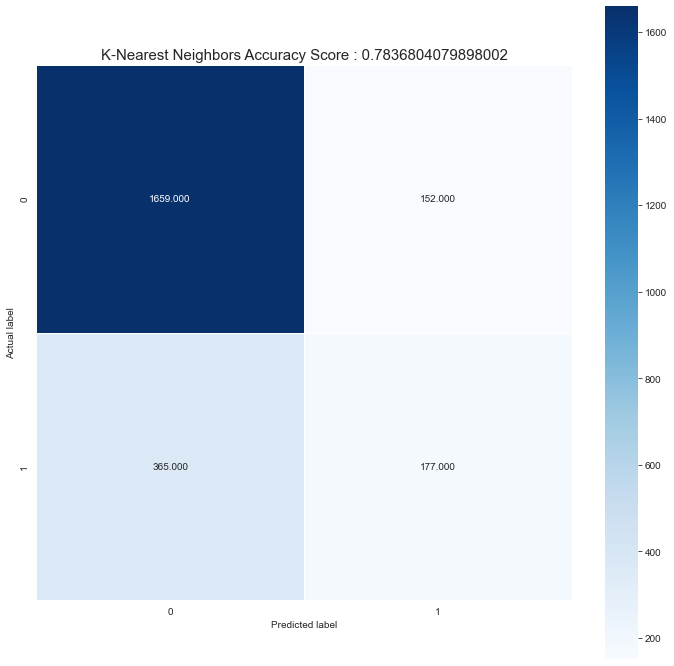

In [74]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =15)

In [75]:
#RandomForest
#accuracy cao nhất => chọn random forest
from sklearn.ensemble import RandomForestClassifier
import time
rf_scores =  []
rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(x_train, y_train).predict(x_test)
end_rf= time.time()
times_rf = timedelta(seconds=round(end_rf - start_rf,4)).total_seconds()
print ("time", times_rf)
rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracies_rf_score = rf_score
print("Accuracy", rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))

time 0.7194
Accuracy 0.8448788780280493
Report               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1811
           1       0.71      0.55      0.62       542

    accuracy                           0.84      2353
   macro avg       0.79      0.74      0.76      2353
weighted avg       0.84      0.84      0.84      2353



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.8448788780280493')

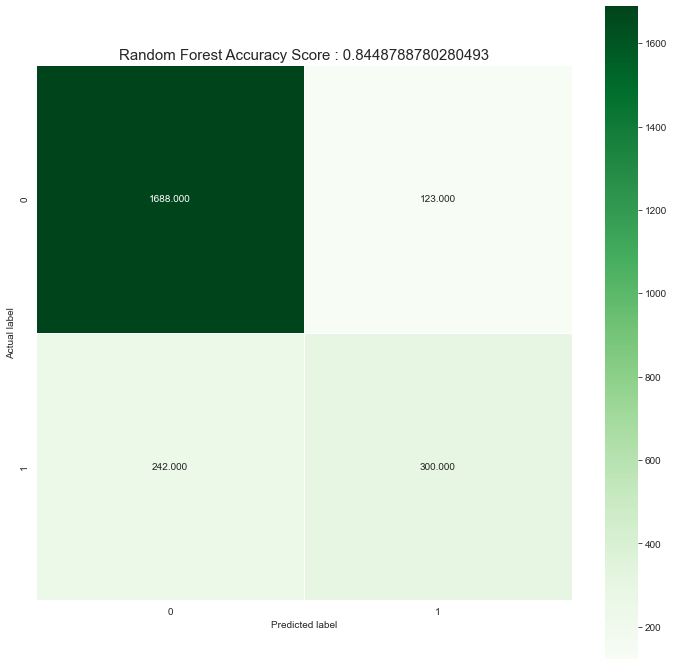

In [76]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(12,12))
ax= sns.heatmap(rf_cm,annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title ='Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =15)

In [77]:
#Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
start_lr = time.time()
lr_scores =  []

In [78]:
lr = LogisticRegression(max_iter=7500)
start_lr = time.time()
lr_pred = lr.fit(x_train, y_train).predict(x_test)
end_lr = time.time()
times_lr = timedelta(seconds=round(end_lr - start_lr,4)).total_seconds()
print("Time Logistic Regression (lr)",times_lr)

Time Logistic Regression (lr) 1.4096


In [79]:
lr_score = metrics.accuracy_score(y_test, lr_pred)
accuracies_logistic_regression=lr_score
print("Accuracy", lr_score)
print("Report", metrics.classification_report(y_test, lr_pred,labels=np.unique(lr_pred)))


Accuracy 0.8308542286442839
Report               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1811
           1       0.68      0.50      0.58       542

    accuracy                           0.83      2353
   macro avg       0.77      0.71      0.74      2353
weighted avg       0.82      0.83      0.82      2353



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.8308542286442839')

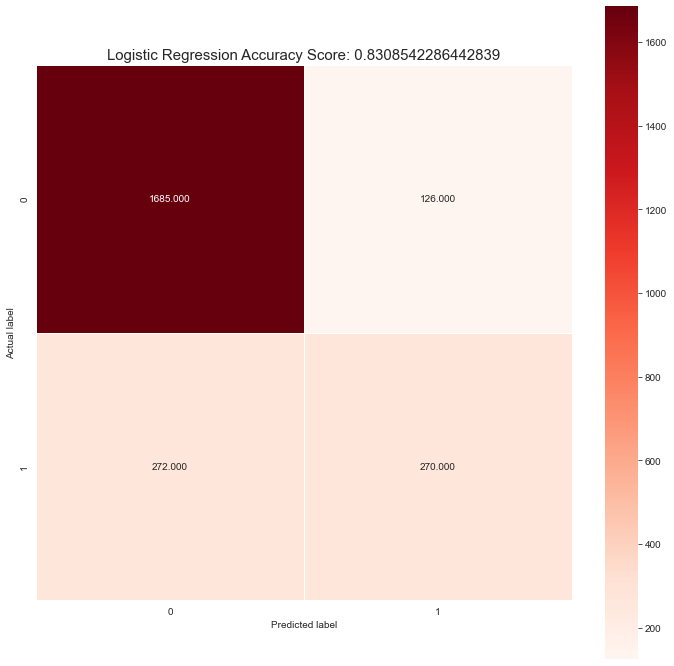

In [80]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm,annot=True, fmt=".3f", linewidths=.5, square =True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Score: {0}'. format(lr_score)
plt.title(title, size =15)

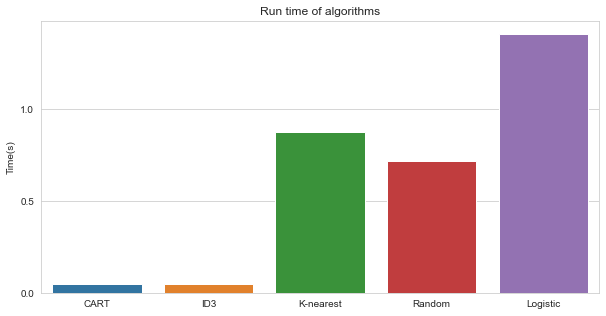

In [81]:
colors = ['purple', 'grey', 'blue', 'green', 'red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,8,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algorithms')
sns.barplot(x=list(['CART','ID3','K-nearest','Random','Logistic']), y= list([times_cart, times_id3, times_knn, times_rf, times_lr]))
plt.show()

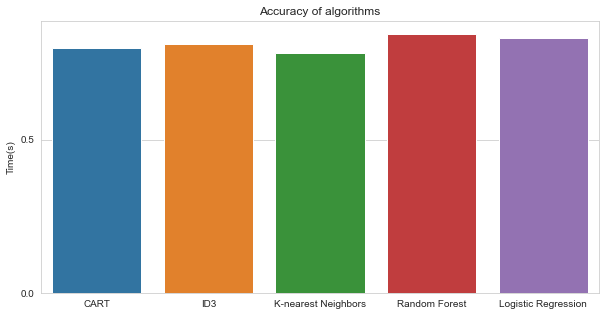

In [82]:
colors = ['purple', 'grey', 'blue', 'green', 'red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1,0.5))
plt.ylabel('Time(s)')
plt.title('Accuracy of algorithms')
sns.barplot(x=list(['CART','ID3','K-nearest Neighbors','Random Forest','Logistic Regression']), y=list([accuracies_cart, accuracies_id3, accuracies_max_knn, accuracies_rf_score, accuracies_logistic_regression]))
plt.show()

# => thuật toán được lựa chọn là random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
#tim thuoc tinh co do tin cay cao
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

feature_imp = pd.Series(clf.feature_importances_, index =df_input.columns).sort_values(ascending =False)
feature_imp

duration     0.216643
poutcome     0.160751
pdays        0.137738
balance      0.093671
day          0.085166
age          0.081797
housing      0.051912
job          0.046154
previous     0.046056
campaign     0.029495
marital      0.021143
education    0.019807
loan         0.009666
dtype: float64

In [85]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel (RandomForestClassifier(n_estimators = 100))
sel.fit (x_train, y_train)


SelectFromModel(estimator=RandomForestClassifier())

In [86]:
selected_feat = x_train.columns[(sel.get_support())]
len(selected_feat)

6

In [87]:
print(selected_feat)

Index(['poutcome', 'age', 'balance', 'day', 'duration', 'pdays'], dtype='object')
